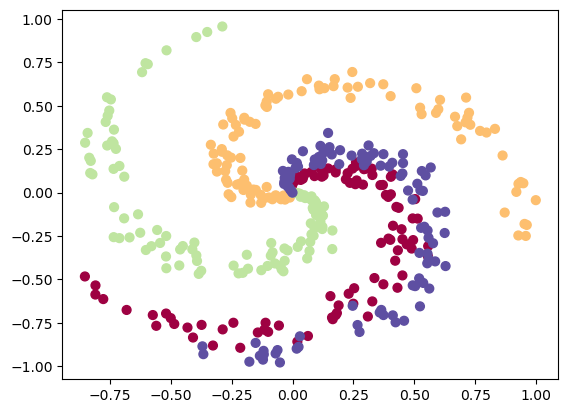

In [16]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [17]:
X.shape , y.shape

((400, 2), (400,))

In [18]:
 import torch 
from torch import nn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
X_use = torch.from_numpy(X).to(torch.float)
y_use = torch.from_numpy(y).to(torch.long)

In [20]:
X_use.dtype ,  y_use.dtype

(torch.float32, torch.int64)

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X_use , y_use , test_size=0.2,random_state=42)

In [22]:
len(X_train) , len(X_test) , len(y_train) ,len(y_test)

(320, 80, 320, 80)

# Model Building

In [23]:
class Spiral(nn.Module):
    def __init__(self,Feature,Classes,hidden=6):
        super().__init__()
        self.linear1 = nn.Linear(in_features=Feature,out_features=hidden)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(in_features=hidden , out_features=Classes)
    def forward(self , x:torch.tensor)->torch.tensor:
        return self.linear3(self.relu2(self.linear2(self.relu1(self.linear1(x)))))

In [24]:
torch.manual_seed(42)
model = Spiral(Feature=D,Classes=K)
model

Spiral(
  (linear1): Linear(in_features=2, out_features=6, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=6, out_features=6, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=6, out_features=4, bias=True)
)

In [25]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323]])),
             ('linear1.bias',
              tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451,  0.1045])),
             ('linear2.weight',
              tensor([[-0.1906,  0.1041, -0.1881, -0.0479, -0.1658,  0.2708],
                      [-0.3223, -0.1882, -0.1153, -0.2455,  0.0385, -0.4032],
                      [ 0.3687, -0.3468,  0.3152,  0.0679, -0.1326,  0.2523],
                      [ 0.0636,  0.3298,  0.0446, -0.1288,  0.1097, -0.1107],
                      [ 0.1718,  0.3645,  0.2360, -0.1785,  0.2357,  0.0730],
                      [ 0.2073, -0.2488, -0.4041, -0.1577, -0.3131,  0.3350]])),
             ('linear2.bias',
              tensor([ 0.1176,  0.1691,  0.1291, -0.0071,  0.3195, -0.2

In [ ]:
# selecting the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch